In [1]:
import pandas as pd

In [2]:
sharks_df = pd.read_excel('GSAF5.xls')


In [3]:
sharks_df.shape

(6970, 23)

In [4]:
sharks_df.columns = sharks_df.columns.str.lower().str.replace(' ','_')

In [5]:
# SE LIMPIA LOS NOMBRES DE LAS COLUMNAS
sharks_df.rename(columns = {'species_': 'species'}, inplace = True)

In [6]:
sharks_df.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'unnamed:_11', 'time', 'species',
       'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22'],
      dtype='object')

In [7]:
#ELIMINAMOS LAS COLUMNAS QUE NO NOS SIRVEN PARA EL ESTUDIO 

sharks_df.drop(['name', 'sex', 'age', 'unnamed:_11', 'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22'], axis=1, inplace =True)

In [8]:
sharks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6970 non-null   object 
 1   year      6968 non-null   float64
 2   type      6952 non-null   object 
 3   country   6920 non-null   object 
 4   state     6488 non-null   object 
 5   location  6405 non-null   object 
 6   activity  6384 non-null   object 
 7   injury    6935 non-null   object 
 8   time      3443 non-null   object 
 9   species   3838 non-null   object 
dtypes: float64(1), object(9)
memory usage: 544.7+ KB


In [9]:
sharks_df.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'injury', 'time', 'species'],
      dtype='object')

In [10]:
# ITERADOR PARA VER LOS VALUE COUNTS DEL DF
for column in sharks_df.columns:
    print(f"Value counts for column: {column}")
    print(sharks_df[column].value_counts())

Value counts for column: date
date
1957           9
1942           8
1958           7
1956           6
No date        6
              ..
11-Aug-2000    1
12-Aug-2000    1
13-Aug-2000    1
15-Aug-2000    1
1845-1853      1
Name: count, Length: 6021, dtype: int64
Value counts for column: year
year
2015.0    143
2017.0    139
2016.0    131
0.0       129
2011.0    128
         ... 
1785.0      1
1784.0      1
1783.0      1
1780.0      1
1822.0      1
Name: count, Length: 261, dtype: int64
Value counts for column: type
type
Unprovoked             5132
Provoked                636
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64
Value counts for column: country
country
USA                   2550
AUSTRALIA             1481
SOUTH AFRICA      

In [11]:
sharks_df['year'].isna().sum()

2

In [12]:
sharks_df[sharks_df['year'].isna()]

,date,year,type,country,state,location,activity,injury,time,species
827,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,"No attack, shark made a threat display",NaN,Bull shark
6739,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,FATAL,NaN,NaN


In [13]:
index_nan = sharks_df[sharks_df['year'].isna()].index
index_nan

Index([827, 6739], dtype='int64')

In [14]:
# MEDIANTE EL INDEX HEMOS CAMBIADO SE HA ASIGNADO VALORES A LOS REGISTROS NANs
sharks_df.loc[827, 'year'] = 2017
sharks_df.loc[6739, 'year'] = 1836
sharks_df['year'].isna().sum()

0

In [15]:
sharks_df['year'] = sharks_df['year'].astype(int)

In [16]:
sharks_df['year'].head(3)

0    2024
1    2024
2    2024
Name: year, dtype: int32

### LO QUE ME INTERESA PRIMERO ES SABER QUE PAISES ESTAN DISPONIBLES.
#### 1. CON LOS PAISES LIMPIOS, NOS CENTRAMOS EN LAS FECHAS O AñOS DISPONIBLES. 
#### 2. LO IDEAL ES COGER UN RANGO DE FECHAS COHERENTE, COMO POR EJEMPLO ULTIMO SIGLO O ULTIMOS 50 AñOS
#### 3. UNA VEZ LIMPIAS TODAS ESTAS COLUMNAS, SE PUEDE VER QUE ESPECIE QUEREMOS DENTRO DE LOS DATOS QUE NOS QUEDAN 
#### 4. Y ESTUDIAR POR QUE UNAS ESPECIES ATACAN MAS UNA MANERA O DE OTRA, SI ES PROVOCADO O NO POR EJMPLO. 
#### 5. VER SI HAY UN PATRON CLARO DE ATAQUES SEGUN QUE PAISES O LOCALIZACION

In [18]:
sharks_df['country'] = sharks_df['country'].str.lower()
sharks_df

,date,year,type,country,state,location,activity,injury,time,species
0,2024-09-16 00:00:00,2024,Unprovoked,morocco,Southern Morocco,West of Dakhla,Swimming - jumped off yacht,Leg severed,1600hr,Reportedly a Great White
1,2024-08-26 00:00:00,2024,Unprovoked,jamaica,Montego Bay,Falmouth,Spearfishing,Head right arm and leg severed,NaN,Reportedly Tiger Shark
2,2024-08-06 00:00:00,2024,Unprovoked,belize,Gulf of Honduras,Central America,Swimming - Diving,Right lower leg amputated after serious bite,11.30hr,Reef shark 6ft (1.8m)
3,2024-07-23 00:00:00,2024,Unprovoked,australia,NSW,"North Shore Beach, Port Macquarie",Surfing,Serious injury to leg,1100hr,3m White Shark
4,2024-07-18 00:00:00,2024,Unprovoked,australia,Western Australia,Trigg beach Sterling,Surfing,Minor injury to lower left leg,1735hr,Undetermined small shall shark
...,...,...,...,...,...,...,...,...,...,...
6965,Before 1903,0,Unprovoked,australia,Western Australia,Roebuck Bay,Diving,FATAL,NaN,NaN
6966,Before 1903,0,Unprovoked,australia,Western Australia,NaN,Pearl diving,FATAL,NaN,NaN
6967,1900-1905,0,Unprovoked,usa,North Carolina,Ocracoke Inlet,Swimming,FATAL,NaN,NaN
6968,1883-1889,0,Unprovoked,panama,NaN,"Panama Bay 8ºN, 79ºW",NaN,FATAL,NaN,NaN


In [19]:
sharks_df[sharks_df['country'].isna()]

,date,year,type,country,state,location,activity,injury,time,species
699,Reported 13-Nov-2017,2017,Unprovoked,NaN,NaN,NaN,Surfing,Puncture wounds to feet,NaN,NaN
1165,Aug-2014,2014,Invalid,NaN,NaN,NaN,Sea disaster,Shark involvement prior to death not confirmed,NaN,Shark involvement not confirmed
3601,Ca. 1983,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Left leg bitten,NaN,NaN
4031,Nov-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,Extensive injuries,NaN,NaN
4040,02-Aug-1970,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,"Sharks scavenged on bodies, but no record of t...",Afternoon,Shark involvement prior to death was not confi...
4041,5-Jul-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,Finger or toe severed,Night,Mako shark
4048,Apr-1970,1970,Provoked,NaN,NaN,NaN,Freediving,Arm abraded & lacerated. Recorded as PROVOKED ...,NaN,Wobbegong shark
4052,5-Feb-1970,1970,Unprovoked,NaN,NaN,NaN,Wading,Lacerations to lower leg,NaN,Carpet shark
4078,Aug-1969,1969,Unprovoked,NaN,NaN,NaN,NaN,Am lacerated,NaN,NaN
4258,21-Oct-1965,1965,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Survived,NaN,NaN


#### ESTUDIO PARA VER EN EL CAMPO COUNTRY QUE VALORES SON NANs Y CUANTOS AFECTAN AL ESTUDIO (>1900)
#### DECISION: PORCENTAJE BAJO, POR TANTO SE ELIMINAN ESTOS REGISTROS DE LA TABLA.

In [21]:
sharks_df[(sharks_df['country'].isna()) & (sharks_df['year'] > 1900)].groupby('year').size()

year
1909    1
1929    1
1931    1
1935    1
1942    4
1944    1
1949    1
1956    2
1960    1
1964    1
1965    1
1969    1
1970    5
1983    1
2014    1
2017    1
dtype: int64

In [22]:
sharks_df = sharks_df.dropna(subset=['country'])

#### NOS QUEDAMOS SOLAMENTE CON LOS REGISTROS QUE TENGAN LA CONDICION YEAR > 1900 & < 2024

In [24]:
sharks_df_1900 = sharks_df[(sharks_df['year'] > 1900) & (sharks_df['year'] < 2024)]

In [25]:
sharks_df_1900['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1984, 1994, 1993, 1992,
       1991, 1990, 1989, 1969, 1988, 1987, 1986, 1985, 1983, 1982, 1981,
       1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970,
       1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958,
       1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947,
       1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936,
       1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925,
       1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914,
       1913, 1912, 1911, 1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903,
       1902, 1901])

In [26]:
sharks_df_1900.shape

(6149, 10)

In [27]:
countries_list = ['morocco', 'jamaica', 'belize', 'australia', 'usa', 'india', 'south africa', 'mexico', 'new zealand', 
                'egypt', 'philippines', 'spain', 'portugal', 'colombia', 'ecuador', 'fiji', 'maldives', 'england', 
                'japan', 'indonesia', 'thailand', 'costa rica', 'canada', 'jordan', 'israel', 'china', 'ireland', 
                'italy', 'malaysia', 'libya', 'mauritius', 'solomon islands', 'united kingdom', 'united arab emirates', 
                'cape verde', 'dominican republic', 'mozambique', 'greece', 'france', 'kiribati', 'taiwan', 
                'palestinian territories', 'nigeria', 'tonga', 'scotland', 'croatia', 'saudi arabia', 'chile', 
                'kenya', 'russia', 'south korea', 'malta', 'vietnam', 'madagascar', 'panama', 'somalia', 'norway', 
                'senegal', 'yemen', 'seychelles', 'vanuatu', 'venezuela', 'sri lanka', 'uruguay', 'micronesia', 
                'tanzania', 'marshall islands', 'hong kong', 'el salvador', 'angola', 'bermuda', 'montenegro', 'iran', 
                'tunisia', 'namibia', 'bangladesh', 'palau', 'western samoa', 'iraq', 'turkey', 'singapore', 'sudan', 
                'lebanon', 'paraguay', 'guinea', 'peru', 'algeria', 'ghana', 'greenland', 'djibouti', 'bahrain']


In [122]:
sharks_df_1900['country'].value_counts()

country
usa             2381
australia       1315
south africa     564
new zealand      114
Name: count, dtype: int64

In [29]:
import warnings
warnings.filterwarnings("ignore")

#### AHORA SE LIMPIA LA COLUMNA Y NOS QUEDAMOS CON TODOS AQUELLOS PAISES QUE SE ENCUENTRAN EN LA LISTA

In [31]:
sharks_df_1900 = sharks_df_1900[sharks_df_1900['country'].isin(countries_list)]

In [32]:
group_countries = sharks_df_1900.groupby(['country']).size()
#pd.set_option('display.max_rows', None)
group_countries

country
angola              1
australia        1315
bangladesh          1
belize              5
bermuda            14
                 ... 
vanuatu            11
venezuela           9
vietnam            12
western samoa       1
yemen               2
Length: 81, dtype: int64

In [33]:
group_countries = group_countries[group_countries >= 100]
group_countries = group_countries.index
sharks_df_1900 = sharks_df_1900[sharks_df_1900['country'].isin(group_countries)]
#pd.set_option('display.max_rows', None)
sharks_df_1900['country']

35               usa
37         australia
38         australia
39         australia
40       new zealand
            ...     
6199       australia
6200       australia
6203    south africa
6207       australia
6208             usa
Name: country, Length: 4374, dtype: object

#### AHORA YA TENEMOS LOS PAISES EN LOS QUE HA HABIDO MAS DE 100 ATAQUES EN EL ULTIMO SIGLO  

In [35]:
pd.set_option('display.max_rows', None)
sharks_df_1900[sharks_df_1900['location'].isna()]

,date,year,type,country,state,location,activity,injury,time,species
149,07-Dec-2022,2022,Unprovoked,usa,Texas,NaN,Surfing,Foot bitten,NaN,Blacktip
211,Reported 27-Apr-2022,2022,Unprovoked,australia,NaN,NaN,Paddleboarding,"No injury, knocked off board by shark chasing ...",NaN,NaN
290,04-Jul-2021,2021,Provoked,usa,BAHAMAS,NaN,Spearfishing,PROVOKED INCIDENT Lacerations to right hand,NaN,Said to involve a bull shark
568,15-Dec-2018,2018,Provoked,australia,New South Wales,NaN,NaN,Bitten on foot when he stepped on the shark P...,11h00,Wobbegong shark
789,26-Apr-2017,2017,Invalid,usa,Florida,NaN,Photo shoot,Alleged laceration to left ankle,NaN,No shark invovlement - it ws a publicity stunt
827,Reported 08-Jan-2017,2017,Invalid,australia,Queensland,NaN,Spearfishing,"No attack, shark made a threat display",NaN,Bull shark
921,May 2016,2016,Unprovoked,usa,Louisiana,NaN,Wading,Minor injury to left foot,NaN,"Blacktip shark, juvenile"
952,29-Jan-2016,2016,Watercraft,south africa,KwaZulu-Natal,NaN,Fishing,"No injury, shark capsized kayak",NaN,NaN
1100,08-Jan-2015,2015,Invalid,usa,Florida,NaN,Swimming after falling overboard,"During his 16-hour swim to shore, he was circl...",Night,No shark involvement
1190,01-Jun-2014,2014,Unprovoked,usa,Palmyra Atoll,NaN,Tagging sharks,Laceration to left hand,NaN,Blacktip Reef shark


In [36]:
sharks_df_1 = sharks_df_1900.copy()

### LIMPIEZA DE LA COLUMA TYPE

In [38]:
sharks_df_1['type'] = sharks_df_1['type'].replace({'Watercraft':'Unprovoked','Boat':'Unprovoked','Sea Disaster':'Unprovoked','Questionable':'Unprovoked','Unverified':'Unknown','Unconfirmed': 'Unknown','Under investigation':'Unknown','Invalid':'Unknown'})
unprovoked = sharks_df_1['type'].value_counts()['Unprovoked']
provoked = sharks_df_1['type'].value_counts()['Provoked']
unknown = sharks_df_1['type'].value_counts()['Unknown']

In [39]:
sharks_df_1['type'].count()

4363

### PORCENTAJE DE ATAQUES 

In [41]:
print(f"Percentage of unprovoked attacks: {unprovoked / sharks_df_1['type'].count():.2%}")
print(f"Percentage of provoked attacks: {provoked / sharks_df_1['type'].count():.2%}")
print(f"Percentage of unknown attacks: {unknown / sharks_df_1['type'].count():.2%}")

Percentage of unprovoked attacks: 82.01%
Percentage of provoked attacks: 9.95%
Percentage of unknown attacks: 8.04%


### LIMPIEZA DE LA COLUMA ESPECIES


In [43]:
sharks_df_1['species'].value_counts()

species
White shark                                                                                                                                                                                152
Shark involvement prior to death was not confirmed                                                                                                                                          78
Shark involvement not confirmed                                                                                                                                                             73
Invalid                                                                                                                                                                                     58
Tiger shark                                                                                                                                                                                 44
4' shark                             

In [44]:
sharks_df_1['species'].isna().sum()

1606

In [45]:
species_count = sharks_df_1['species'].value_counts()
species_count

species
White shark                                                                                                                                                                                152
Shark involvement prior to death was not confirmed                                                                                                                                          78
Shark involvement not confirmed                                                                                                                                                             73
Invalid                                                                                                                                                                                     58
Tiger shark                                                                                                                                                                                 44
4' shark                             

In [46]:
sharks_df_1['species'] = sharks_df_1['species'].str.lower()

In [47]:
sharks_df_1['species'] = sharks_df_1['species'].fillna('Unknown')
species_list = sharks_df_1['species'].value_counts().index.to_list()

### PASAMOS UN MAPPING Y CONDICIONES REGEX A LA COLUMNA PARA DEPURAR 

In [49]:
species_mapping = {
    r'(?i).*white.*': 'white shark',
    r'(?i).*bull.*': 'bull shark',
    r'(?i).*grey.*': 'nurse shark',
    r'(?i).*nurse.*': 'nurse shark',
    r'(?i).*tiger.*': 'tiger shark',
    r'(?i).*spinner.*': 'spinner shark',
    r'(?i).*wobbegong .*': 'wobbegong shark',
    r'(?i).*lemon.*': 'lemon shark',
    r'\b([7-9]|[1-9][0-9]+)\b': 'white shark' #suponemos que todos los tiburones mayores de 6m son tiburones blancos
}

# Reemplazar usando el diccionario
sharks_df_1['species'] = sharks_df_1['species'].replace(species_mapping, regex=True)

In [50]:
sharks_df_1['species'].value_counts().head()


species
Unknown        1606
white shark     601
tiger shark     214
bull shark      132
nurse shark     102
Name: count, dtype: int64

### SE CREA UNA LISTA DE LAS ESPECIES PRINCIPALES OBTENIDAS Y EL RESTO SE PASA A 'UNKNOWN'

In [52]:
species_list = ['white shark', 'bull shark', 'nurse shark', 'tiger shark', 'spinner shark', 'wobbegong shark', 'lemon shark']
species_list

['white shark',
 'bull shark',
 'nurse shark',
 'tiger shark',
 'spinner shark',
 'wobbegong shark',
 'lemon shark']

In [53]:
## APLICAMOS LA FUNCION .APPLY 
sharks_df_1['species'] =  sharks_df_1['species'].apply(lambda x: x if x in species_list else 'unknown')

In [54]:
sharks_df_1['species'].value_counts()

species
unknown            3199
white shark         601
tiger shark         214
bull shark          132
nurse shark         102
spinner shark        53
wobbegong shark      49
lemon shark          24
Name: count, dtype: int64

In [55]:
sharks_df_1.head(50)

,date,year,type,country,state,location,activity,injury,time,species
35,30 Dec-2023,2023,Unprovoked,usa,Hawaii,"Baby Beach, Maui",Surfing,FATAL,11h12,unknown
37,28 Dec-2023,2023,Unprovoked,australia,South Australia,Ethel Beach,Surfing,FATAL,13h30,white shark
38,25 Dec-2023,2023,Unprovoked,australia,New South Wales,Old Bar,Surfing,Injury to right thigh,16h30,unknown
39,24-Dec-2023,2023,Unprovoked,australia,Western Australia,Wedge Island,Foil Boarding,Puncture wounds to right ankle,15h00,unknown
40,18 Dec-2023,2023,Unprovoked,new zealand,South Island,Riverton,Wading,Significant injury to leg,02h00,unknown
43,08 Dec-2023,2023,Unprovoked,australia,Queensland,1770,Snorkeling,Leg severely injured,16h32,unknown
46,30 Nov-2023,2023,Unprovoked,australia,Queensland,Clack Island,Swimming,Puncture wounds to right upper arm,11h30,bull shark
48,10 Nov-2023,2023,Unprovoked,australia,South Australia,Port Noarlunga,Free diving,Injuries to scalp and face,13h20,unknown
49,05 Nov-2023,2023,Unprovoked,usa,Florida,"Juno Beach, Palm Beach County",Swimming,Lacerations to right forearm,10h30,unknown
50,03 Nov-2023,2023,Unprovoked,australia,Westerm Australia,Peak Island,Spearfishing,Minor injury,14h00,lemon shark


# ESTADISTICAS


In [57]:
#sharks_df_1 = sharks_df_1.groupby('type').get_group('Unprovoked')

In [58]:
#sharks_df_1['type'].value_counts()

In [59]:
sharks_df_plot = sharks_df_1[sharks_df['species'] != 'unknown']

In [60]:
sharks_df_plot = sharks_df_1.query("species != 'unknown'")


In [61]:
sharks_df_plot['species'].value_counts()

species
white shark        601
tiger shark        214
bull shark         132
nurse shark        102
spinner shark       53
wobbegong shark     49
lemon shark         24
Name: count, dtype: int64

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns

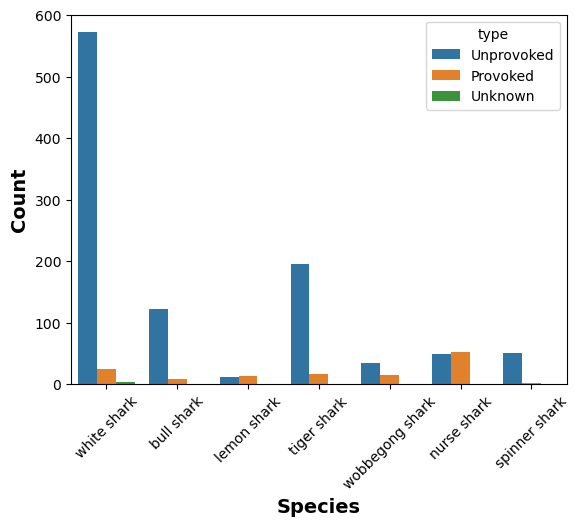

In [124]:
sns.countplot(data=sharks_df_plot, x='species', hue='type')
plt.xticks(rotation=45)
plt.xlabel('Species', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

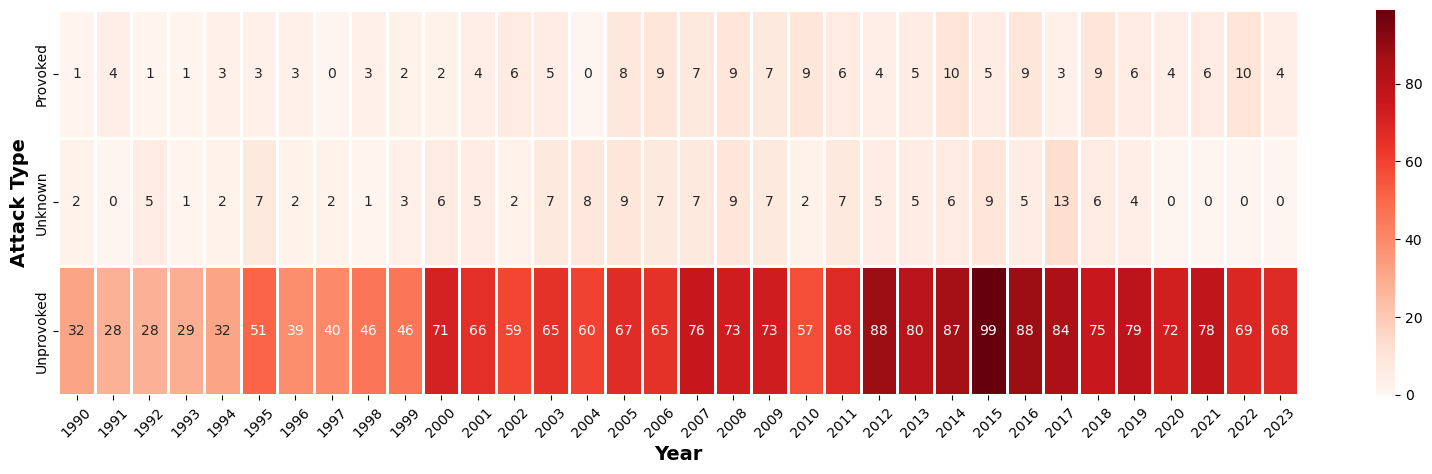

In [64]:
heatmap_data = pd.crosstab(sharks_df_1['type'], sharks_df_1['year'])

start_year = 1990
end_year = 2024

sharks_df_filtered = sharks_df_1[(sharks_df_1['year'] >= start_year) & (sharks_df_1['year'] <= end_year)]
heatmap_data = pd.crosstab(sharks_df_filtered['type'], sharks_df_filtered['year'])

plt.figure(figsize=(20, 5))  # Ajusta el tamaño si es necesario
sns.heatmap(heatmap_data, cmap='Reds', linewidths=1, annot=True)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas de año si es necesario
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Attack Type', fontsize=14, fontweight='bold')
plt.show()



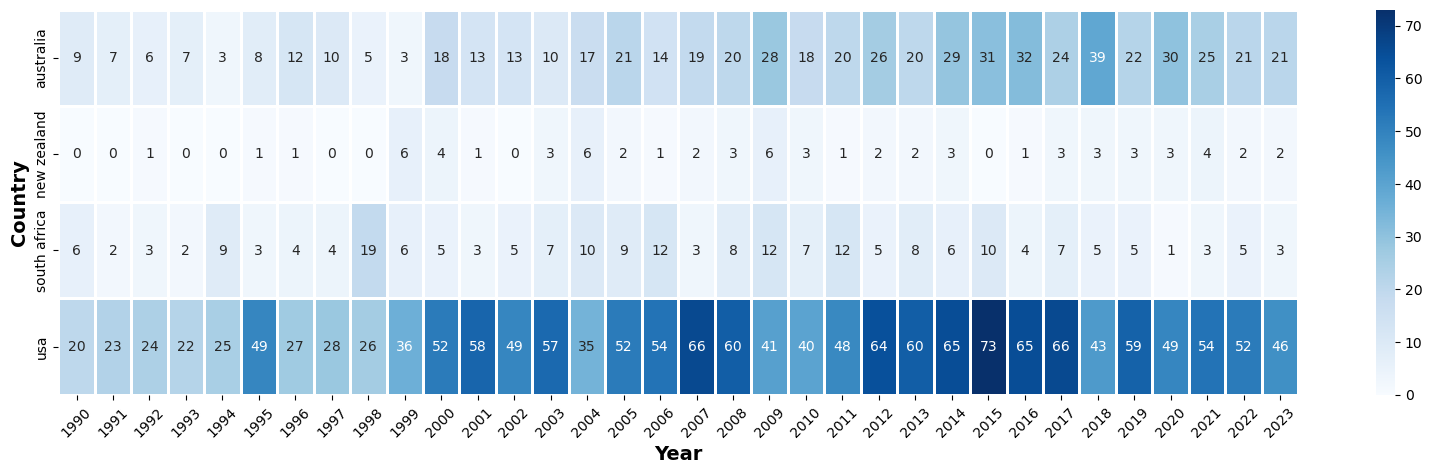

In [65]:
heatmap_data_1= pd.crosstab(sharks_df_1['country'], sharks_df_1['year'])

start_year_1 = 1990
end_year_1 = 2024

sharks_df_filtered_1 = sharks_df_1[(sharks_df_1['year'] >= start_year) & (sharks_df_1['year'] <= end_year)]
heatmap_data_1 = pd.crosstab(sharks_df_filtered_1['country'], sharks_df_filtered_1['year'])

plt.figure(figsize=(20, 5))  # Ajusta el tamaño si es necesario
sns.heatmap(heatmap_data_1, cmap='Blues', linewidths=1, annot=True)

# Mostrar el gráfico
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Country', fontsize=14, fontweight='bold')
plt.show()

# Cambiar tamaño y estilo de las etiquetas de los ejes
  # Aumenta tamaño y negrita en el eje X
  # Aumenta tamaño y negrita en el eje Y